全集训练曲线

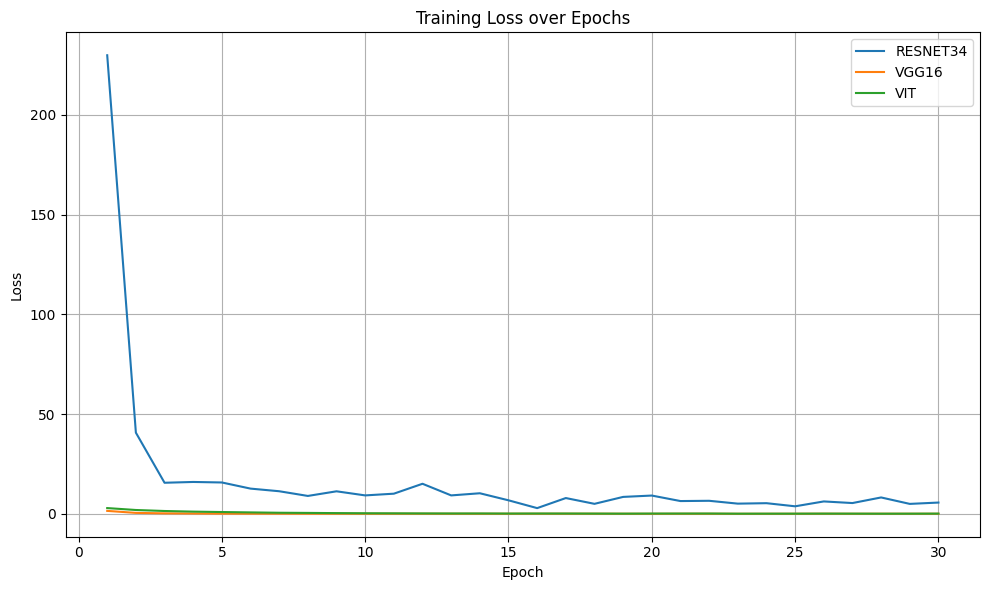

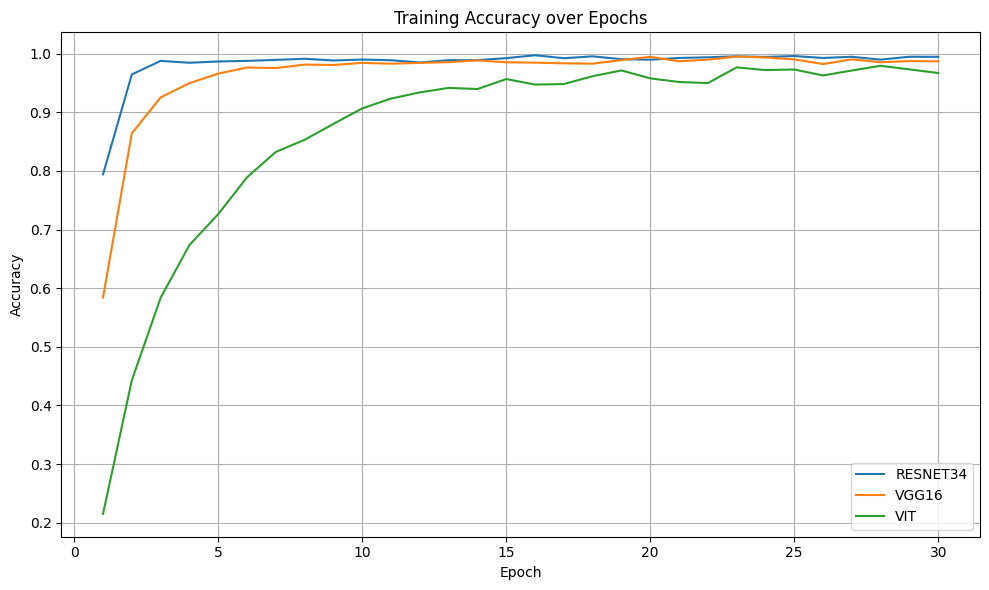

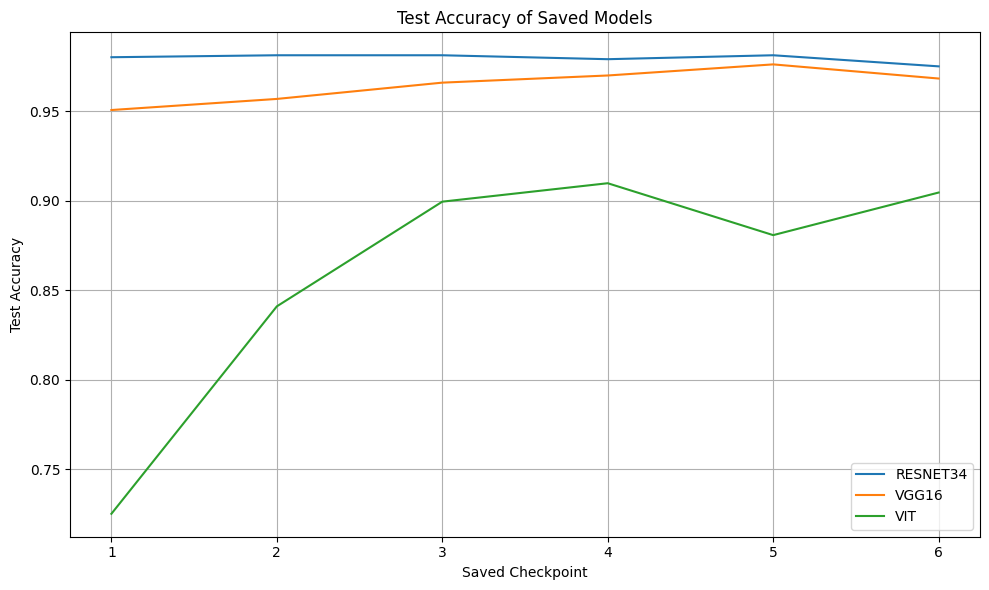

In [3]:
import re
import matplotlib.pyplot as plt

# 读取上传的文件内容
log_path = "log_all_data.txt"
with open(log_path, "r", encoding="utf-8") as f:
    log_data = f.read()

# 模型标记
models = ['resnet34', 'vgg16', 'vit']
train_losses = {model: [] for model in models}
train_accuracies = {model: [] for model in models}
test_accuracies = {model: [] for model in models}

# 提取每个模型对应的训练段
splits = re.split(r"--(resnet34|VGG16|VIT)", log_data)
model_chunks = list(zip(splits[1::2], splits[2::2]))  # [(模型名, 内容)]

# 解析每个模型的训练损失和准确率
for model_raw, chunk in model_chunks:
    model = model_raw.lower()
    matches = re.findall(r"Loss: ([\d.]+), Accuracy: ([\d.]+)", chunk)
    for loss, acc in matches:
        train_losses[model].append(float(loss))
        train_accuracies[model].append(float(acc))
    
    test_matches = re.findall(rf"{model}_epoch\d+\.pth - Test Accuracy: ([\d.]+)", chunk, re.IGNORECASE)
    for acc in test_matches:
        test_accuracies[model].append(float(acc))

# 绘图函数
def plot_metric(data_dict, ylabel, title, filename):
    plt.figure(figsize=(10, 6))
    for model in data_dict:
        plt.plot(range(1, len(data_dict[model]) + 1), data_dict[model], label=model.upper())
    plt.xlabel("Epoch" if 'train' in filename else "Saved Checkpoint")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{filename}.png")
    plt.show()

# 绘制三张图
plot_metric(train_losses, "Loss", "Training Loss over Epochs", "train_loss")
plot_metric(train_accuracies, "Accuracy", "Training Accuracy over Epochs", "train_accuracy")
plot_metric(test_accuracies, "Test Accuracy", "Test Accuracy of Saved Models", "test_accuracy")


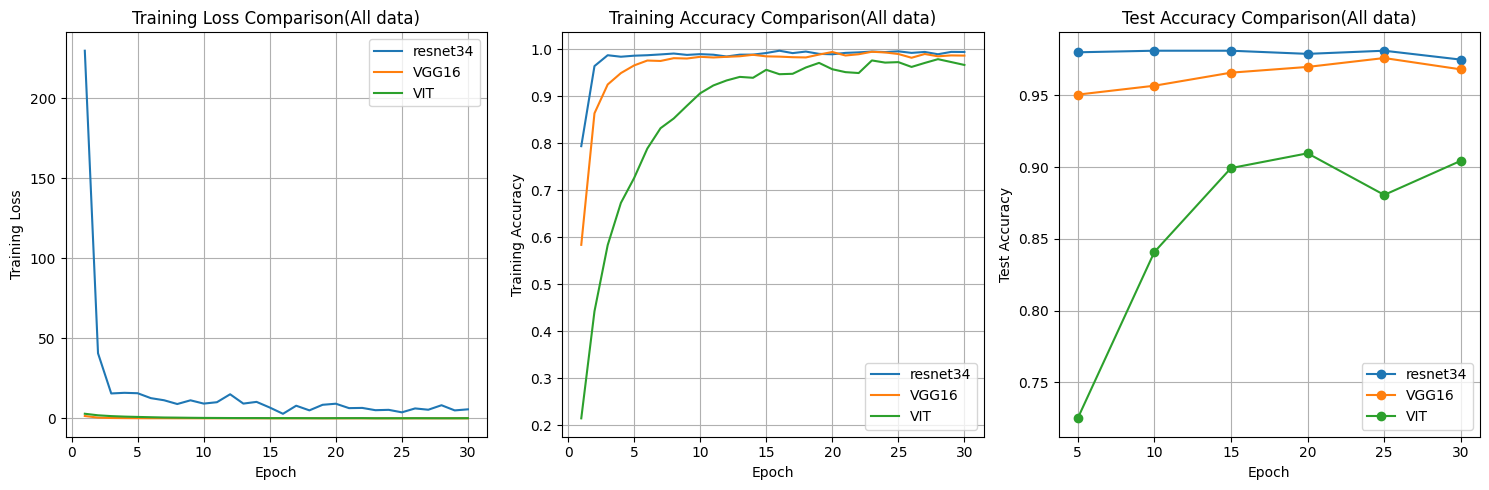

In [26]:
import re
import matplotlib.pyplot as plt

# Initialize data storage
models = {
    'resnet34': {'epochs': [], 'train_loss': [], 'train_acc': [], 'test_epochs': [], 'test_acc': []},
    'VGG16': {'epochs': [], 'train_loss': [], 'train_acc': [], 'test_epochs': [], 'test_acc': []},
    'VIT': {'epochs': [], 'train_loss': [], 'train_acc': [], 'test_epochs': [], 'test_acc': []}
}

current_model = None

# Parse the log file
with open('log_all_data.txt', 'r') as f:
    for line in f:
        line = line.strip()
        
        # Check for model headers
        if line.startswith('--'):
            if 'resnet34' in line:
                current_model = 'resnet34'
            elif 'VGG16' in line:
                current_model = 'VGG16'
            elif 'VIT' in line:
                current_model = 'VIT'
            continue
        
        if not current_model:
            continue
            
        # Parse training data
        if 'Epoch [' in line and 'Complete' in line:
            epoch_match = re.search(r'Epoch \[(\d+)/\d+\] Complete - Loss: ([\d.]+), Accuracy: ([\d.]+)', line)
            if epoch_match:
                epoch = int(epoch_match.group(1))
                loss = float(epoch_match.group(2))
                acc = float(epoch_match.group(3))
                models[current_model]['epochs'].append(epoch)
                models[current_model]['train_loss'].append(loss)
                models[current_model]['train_acc'].append(acc)
        
        # Parse test data
        if '.pth - Test Accuracy:' in line:
            test_match = re.search(r'_epoch(\d+)\.pth - Test Accuracy: ([\d.]+)', line)
            if test_match:
                epoch = int(test_match.group(1))
                acc = float(test_match.group(2))
                models[current_model]['test_epochs'].append(epoch)
                models[current_model]['test_acc'].append(acc)

# Create plots
plt.figure(figsize=(15, 5))

# 1. Training Loss
plt.subplot(1, 3, 1)
for model_name, data in models.items():
    plt.plot(data['epochs'], data['train_loss'], label=model_name)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison(All data)')
plt.legend()
plt.grid(True)

# 2. Training Accuracy
plt.subplot(1, 3, 2)
for model_name, data in models.items():
    plt.plot(data['epochs'], data['train_acc'], label=model_name)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison(All data)')
plt.legend()
plt.grid(True)

# 3. Test Accuracy
plt.subplot(1, 3, 3)
for model_name, data in models.items():
    plt.plot(data['test_epochs'], data['test_acc'], 'o-', label=model_name)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison(All data)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

十分之一训练集

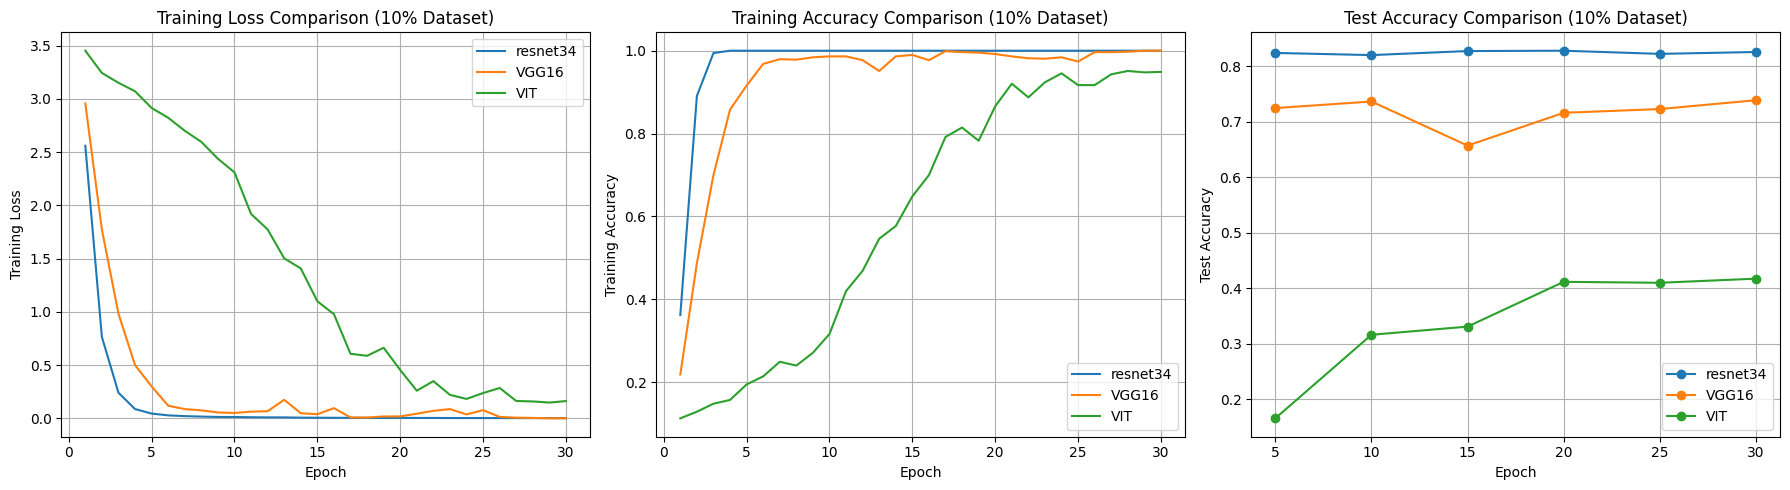

In [25]:
import re
import matplotlib.pyplot as plt

# Initialize data storage
models = {
    'resnet34': {'epochs': [], 'train_loss': [], 'train_acc': [], 'test_epochs': [], 'test_acc': []},
    'VGG16': {'epochs': [], 'train_loss': [], 'train_acc': [], 'test_epochs': [], 'test_acc': []},
    'VIT': {'epochs': [], 'train_loss': [], 'train_acc': [], 'test_epochs': [], 'test_acc': []}
}

current_model = None

# Parse the log file
with open('log_10percent_data.txt', 'r') as f:
    for line in f:
        line = line.strip()
        
        # Check for model headers
        if line.startswith('--'):
            if 'resnet34' in line:
                current_model = 'resnet34'
            elif 'VGG16' in line:
                current_model = 'VGG16'
            elif 'VIT' in line:
                current_model = 'VIT'
            continue
        
        if not current_model:
            continue
            
        # Parse ResNet34 training data
        if current_model == 'resnet34' and 'Epoch [' in line and 'Complete' in line:
            epoch_match = re.search(r'Epoch \[(\d+)/\d+\] Complete - Loss: ([\d.]+), Accuracy: ([\d.]+)', line)
            if epoch_match:
                epoch = int(epoch_match.group(1))
                loss = float(epoch_match.group(2))
                acc = float(epoch_match.group(3))
                models[current_model]['epochs'].append(epoch)
                models[current_model]['train_loss'].append(loss)
                models[current_model]['train_acc'].append(acc)
        
        # Parse VGG16 training data
        elif current_model == 'VGG16' and 'Epoch [' in line and 'Loss:' in line:
            epoch_match = re.search(r'Epoch \[(\d+)/\d+\] - Loss: ([\d.]+), Train Acc: ([\d.]+), Test Acc: ([\d.]+)', line)
            if epoch_match:
                epoch = int(epoch_match.group(1))
                loss = float(epoch_match.group(2))
                acc = float(epoch_match.group(3))
                models[current_model]['epochs'].append(epoch)
                models[current_model]['train_loss'].append(loss)
                models[current_model]['train_acc'].append(acc)
        
        # Parse ViT training data
        elif current_model == 'VIT' and '[Epoch ' in line and 'Loss:' in line:
            epoch_match = re.search(r'\[Epoch (\d+)/\d+\] Loss: ([\d.]+), Train Accuracy: ([\d.]+), Val Accuracy: ([\d.]+)', line)
            if epoch_match:
                epoch = int(epoch_match.group(1))
                loss = float(epoch_match.group(2))
                acc = float(epoch_match.group(3))
                models[current_model]['epochs'].append(epoch)
                models[current_model]['train_loss'].append(loss)
                models[current_model]['train_acc'].append(acc)
        
        # Parse test data for all models
        if '.pth - Test Accuracy:' in line:
            test_match = re.search(r'_epoch(\d+)\.pth - Test Accuracy: ([\d.]+)', line)
            if test_match:
                epoch = int(test_match.group(1))
                acc = float(test_match.group(2))
                models[current_model]['test_epochs'].append(epoch)
                models[current_model]['test_acc'].append(acc)

# Create plots
plt.figure(figsize=(18, 5))

# 1. Training Loss
plt.subplot(1, 3, 1)
for model_name, data in models.items():
    plt.plot(data['epochs'], data['train_loss'], label=model_name)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison (10% Dataset)')
plt.legend()
plt.grid(True)

# 2. Training Accuracy
plt.subplot(1, 3, 2)
for model_name, data in models.items():
    plt.plot(data['epochs'], data['train_acc'], label=model_name)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison (10% Dataset)')
plt.legend()
plt.grid(True)

# 3. Test Accuracy
plt.subplot(1, 3, 3)
for model_name, data in models.items():
    plt.plot(data['test_epochs'], data['test_acc'], 'o-', label=model_name)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison (10% Dataset)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

多种增强之后的十分之一数据集

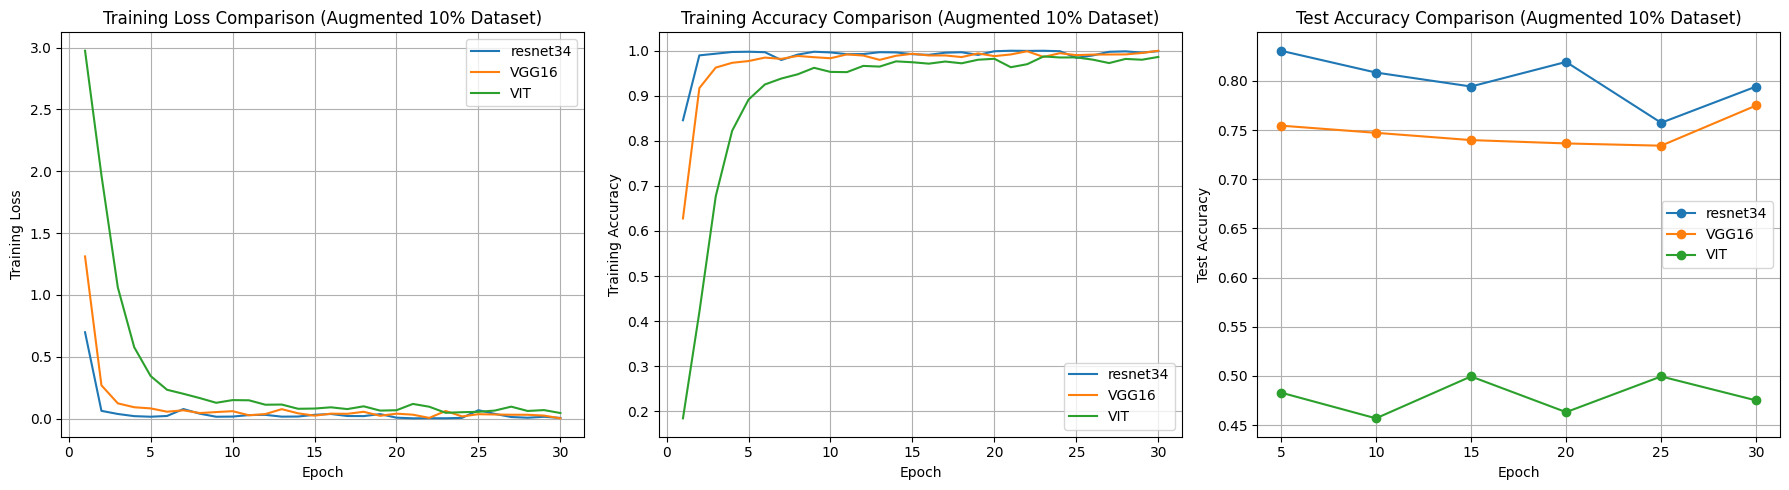

In [3]:
import re
import matplotlib.pyplot as plt

# Initialize data storage
models = {
    'resnet34': {'epochs': [], 'train_loss': [], 'train_acc': [], 'test_epochs': [], 'test_acc': []},
    'VGG16': {'epochs': [], 'train_loss': [], 'train_acc': [], 'test_epochs': [], 'test_acc': []},
    'VIT': {'epochs': [], 'train_loss': [], 'train_acc': [], 'test_epochs': [], 'test_acc': []}
}

current_model = None

# Parse the log file
with open('log_improve10percent_data.txt', 'r') as f:
    for line in f:
        line = line.strip()
        
        # Check for model headers
        if line.startswith('--'):
            if 'resnet34' in line:
                current_model = 'resnet34'
            elif 'VGG16' in line:
                current_model = 'VGG16'
            elif 'VIT' in line:
                current_model = 'VIT'
            continue
        
        if not current_model:
            continue
            
        # Parse ResNet34 training data
        if current_model == 'resnet34' and 'Epoch [' in line and 'Complete' in line:
            epoch_match = re.search(r'Epoch \[(\d+)/\d+\] Complete - Loss: ([\d.]+), Accuracy: ([\d.]+)', line)
            if epoch_match:
                epoch = int(epoch_match.group(1))
                loss = float(epoch_match.group(2))
                acc = float(epoch_match.group(3))
                models[current_model]['epochs'].append(epoch)
                models[current_model]['train_loss'].append(loss)
                models[current_model]['train_acc'].append(acc)
        
        # Parse VGG16 training data
        elif current_model == 'VGG16' and 'Epoch [' in line and 'Complete' in line:
            epoch_match = re.search(r'Epoch \[(\d+)/\d+\] Complete - Loss: ([\d.]+), Accuracy: ([\d.]+)', line)
            if epoch_match:
                epoch = int(epoch_match.group(1))
                loss = float(epoch_match.group(2))
                acc = float(epoch_match.group(3))
                models[current_model]['epochs'].append(epoch)
                models[current_model]['train_loss'].append(loss)
                models[current_model]['train_acc'].append(acc)
        
        # Parse ViT training data
        elif current_model == 'VIT' and 'Epoch [' in line and 'Complete' in line:
            epoch_match = re.search(r'Epoch \[(\d+)/\d+\] Complete - Loss: ([\d.]+), Accuracy: ([\d.]+)', line)
            if epoch_match:
                epoch = int(epoch_match.group(1))
                loss = float(epoch_match.group(2))
                acc = float(epoch_match.group(3))
                models[current_model]['epochs'].append(epoch)
                models[current_model]['train_loss'].append(loss)
                models[current_model]['train_acc'].append(acc)
        
        # Parse test accuracy data (inline during training)
        if 'Test Accuracy at Epoch' in line:
            test_match = re.search(r'Test Accuracy at Epoch (\d+): ([\d.]+)', line)
            if test_match:
                epoch = int(test_match.group(1))
                acc = float(test_match.group(2))
                models[current_model]['test_epochs'].append(epoch)
                models[current_model]['test_acc'].append(acc)
        
        # Parse test accuracy data (from evaluation section)
        if '.pth - Test Accuracy:' in line:
            test_match = re.search(r'_epoch(\d+)\.pth - Test Accuracy: ([\d.]+)', line)
            if test_match:
                epoch = int(test_match.group(1))
                acc = float(test_match.group(2))
                # Only add if not already in test_epochs (to avoid duplicates)
                if epoch not in models[current_model]['test_epochs']:
                    models[current_model]['test_epochs'].append(epoch)
                    models[current_model]['test_acc'].append(acc)

# Create plots
plt.figure(figsize=(18, 5))

# 1. Training Loss
plt.subplot(1, 3, 1)
for model_name, data in models.items():
    plt.plot(data['epochs'], data['train_loss'], label=model_name)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison (Augmented 10% Dataset)')
plt.legend()
plt.grid(True)

# 2. Training Accuracy
plt.subplot(1, 3, 2)
for model_name, data in models.items():
    plt.plot(data['epochs'], data['train_acc'], label=model_name)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison (Augmented 10% Dataset)')
plt.legend()
plt.grid(True)

# 3. Test Accuracy
plt.subplot(1, 3, 3)
for model_name, data in models.items():
    if data['test_epochs']:  # Only plot if we have test data
        plt.plot(data['test_epochs'], data['test_acc'], 'o-', label=model_name)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison (Augmented 10% Dataset)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Resnet34不同数据集对比

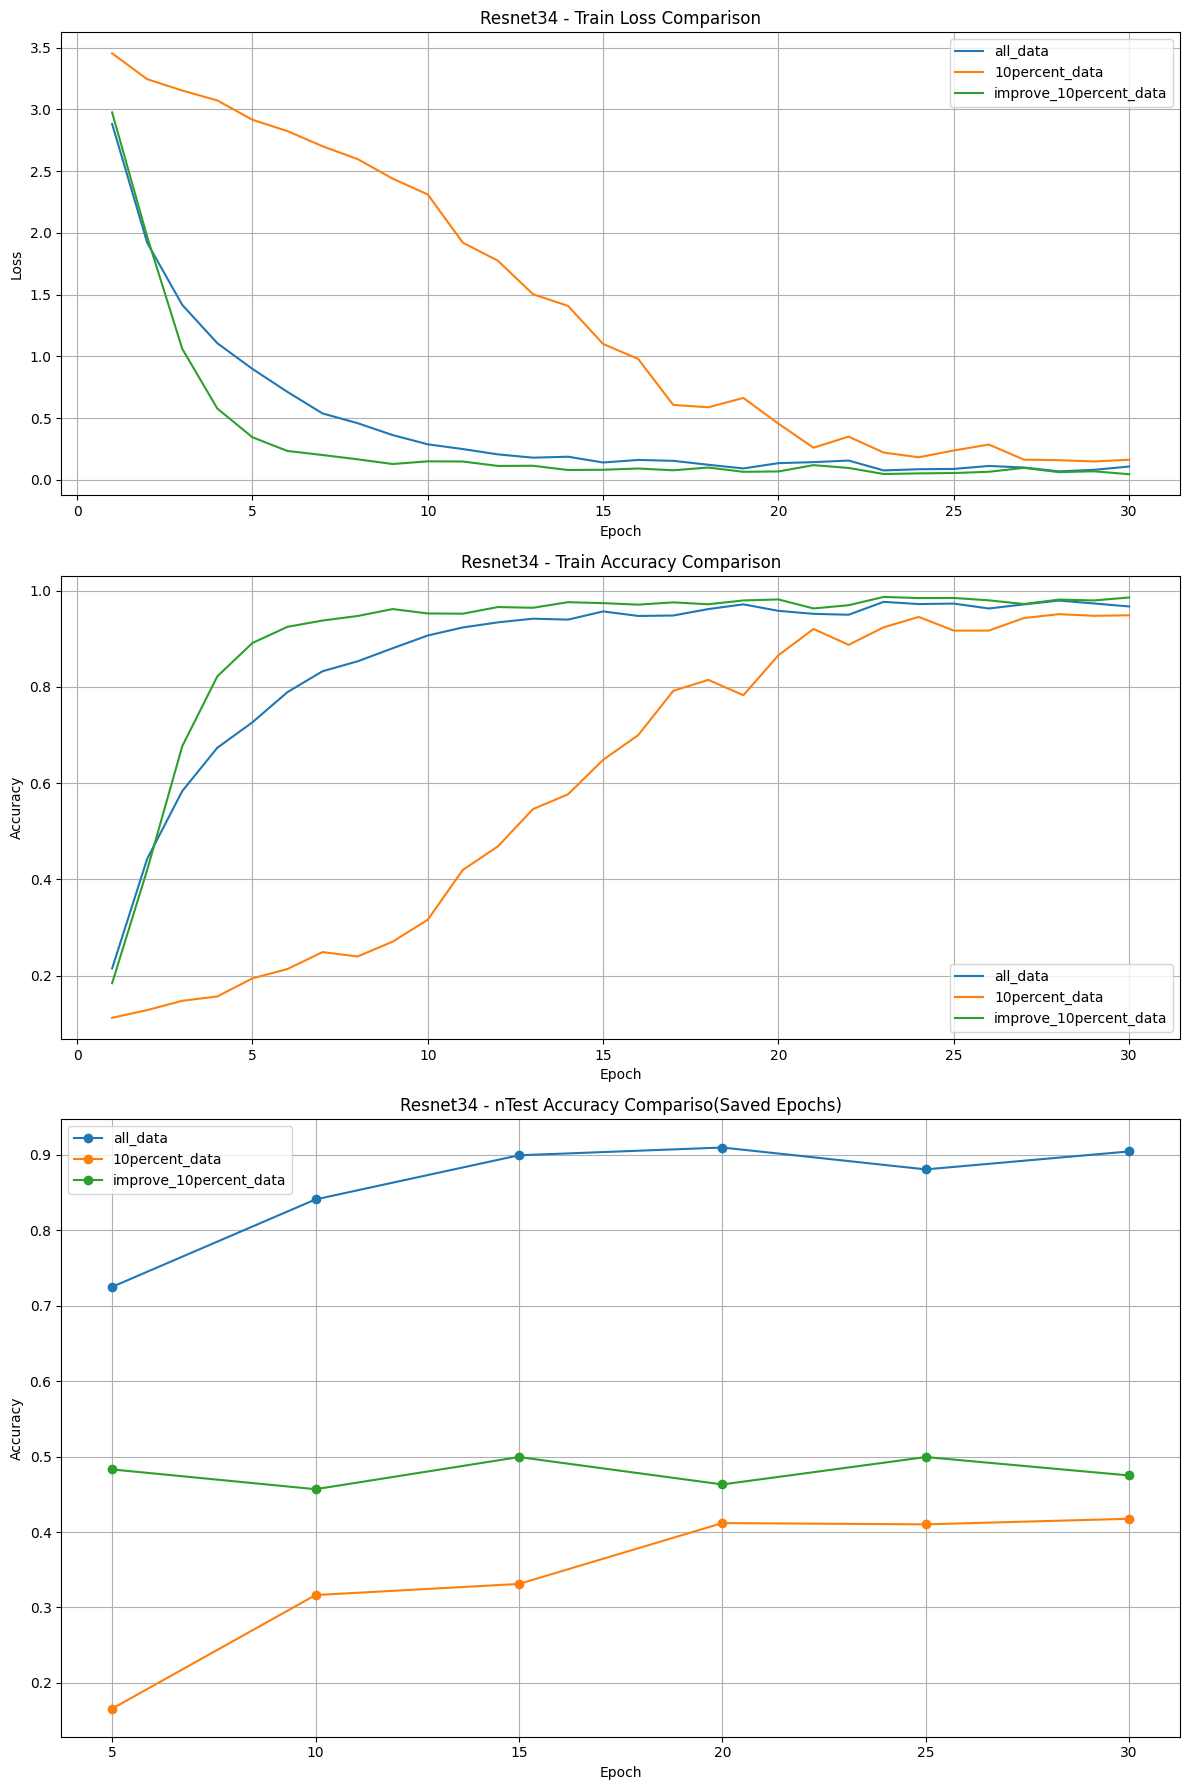

In [23]:
import pandas as pd

# 构造 DataFrame 表格数据
table_data = []
for key, data in results.items():
    for epoch, loss, acc in zip(range(1, len(data["train_loss"]) + 1), data["train_loss"], data["train_acc"]):
        test_acc = None
        if epoch in data["test_epochs"]:
            idx = data["test_epochs"].index(epoch)
            test_acc = data["test_acc"][idx]
        table_data.append([key, epoch, loss, acc, test_acc])

df = pd.DataFrame(table_data, columns=["Setting", "Epoch", "Train Loss", "Train Accuracy", "Test Accuracy"])
df_pivot = df.pivot(index="Epoch", columns="Setting", values="Test Accuracy")

# 重新绘图，加上表格
fig, axs = plt.subplots(3, 1, figsize=(12, 18), gridspec_kw={"height_ratios": [3, 3, 4]})

# 训练损失曲线
for key, data in results.items():
    epochs = list(range(1, len(data["train_loss"]) + 1))
    axs[0].plot(epochs, data["train_loss"], label=key)
axs[0].set_title("Resnet34 - Train Loss Comparison")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

# 训练准确率曲线
for key, data in results.items():
    epochs = list(range(1, len(data["train_acc"]) + 1))
    axs[1].plot(epochs, data["train_acc"], label=key)
axs[1].set_title("Resnet34 - Train Accuracy Comparison")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].legend()
axs[1].grid(True)

# 测试准确率曲线 + 表格
for key, data in results.items():
    axs[2].plot(data["test_epochs"], data["test_acc"], marker='o', label=key)
axs[2].set_title("Resnet34 - nTest Accuracy Compariso(Saved Epochs)")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("Accuracy")
axs[2].legend()
axs[2].grid(True)


plt.tight_layout()
plt.show()


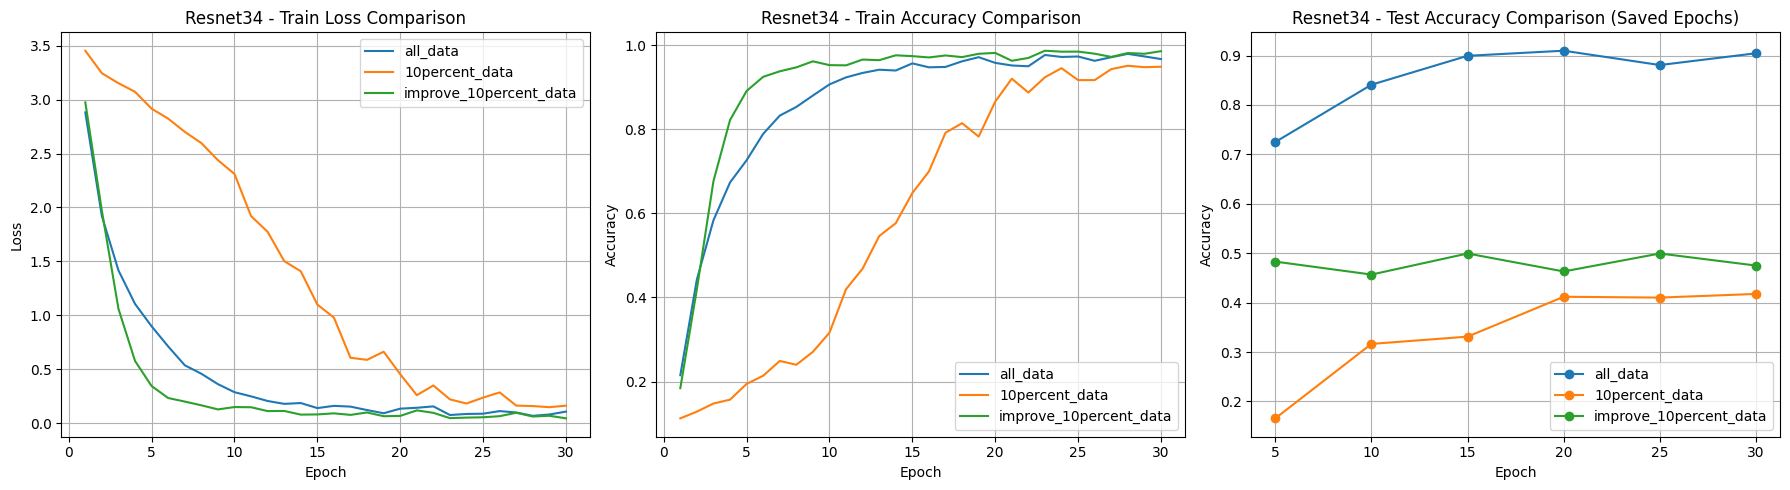

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 构造 DataFrame 表格数据
table_data = []
for key, data in results.items():
    for epoch, loss, acc in zip(range(1, len(data["train_loss"]) + 1), data["train_loss"], data["train_acc"]):
        test_acc = None
        if epoch in data["test_epochs"]:
            idx = data["test_epochs"].index(epoch)
            test_acc = data["test_acc"][idx]
        table_data.append([key, epoch, loss, acc, test_acc])

df = pd.DataFrame(table_data, columns=["Setting", "Epoch", "Train Loss", "Train Accuracy", "Test Accuracy"])
df_pivot = df.pivot(index="Epoch", columns="Setting", values="Test Accuracy")

# 创建一行三列的图表布局
plt.figure(figsize=(18, 5))

# 1. 训练损失曲线
plt.subplot(1, 3, 1)
for key, data in results.items():
    epochs = list(range(1, len(data["train_loss"]) + 1))
    plt.plot(epochs, data["train_loss"], label=key)
plt.title("Resnet34 - Train Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# 2. 训练准确率曲线
plt.subplot(1, 3, 2)
for key, data in results.items():
    epochs = list(range(1, len(data["train_acc"]) + 1))
    plt.plot(epochs, data["train_acc"], label=key)
plt.title("Resnet34 - Train Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# 3. 测试准确率曲线
plt.subplot(1, 3, 3)
for key, data in results.items():
    plt.plot(data["test_epochs"], data["test_acc"], 'o-', label=key)
plt.title("Resnet34 - Test Accuracy Comparison (Saved Epochs)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



VGG16不同数据集对比

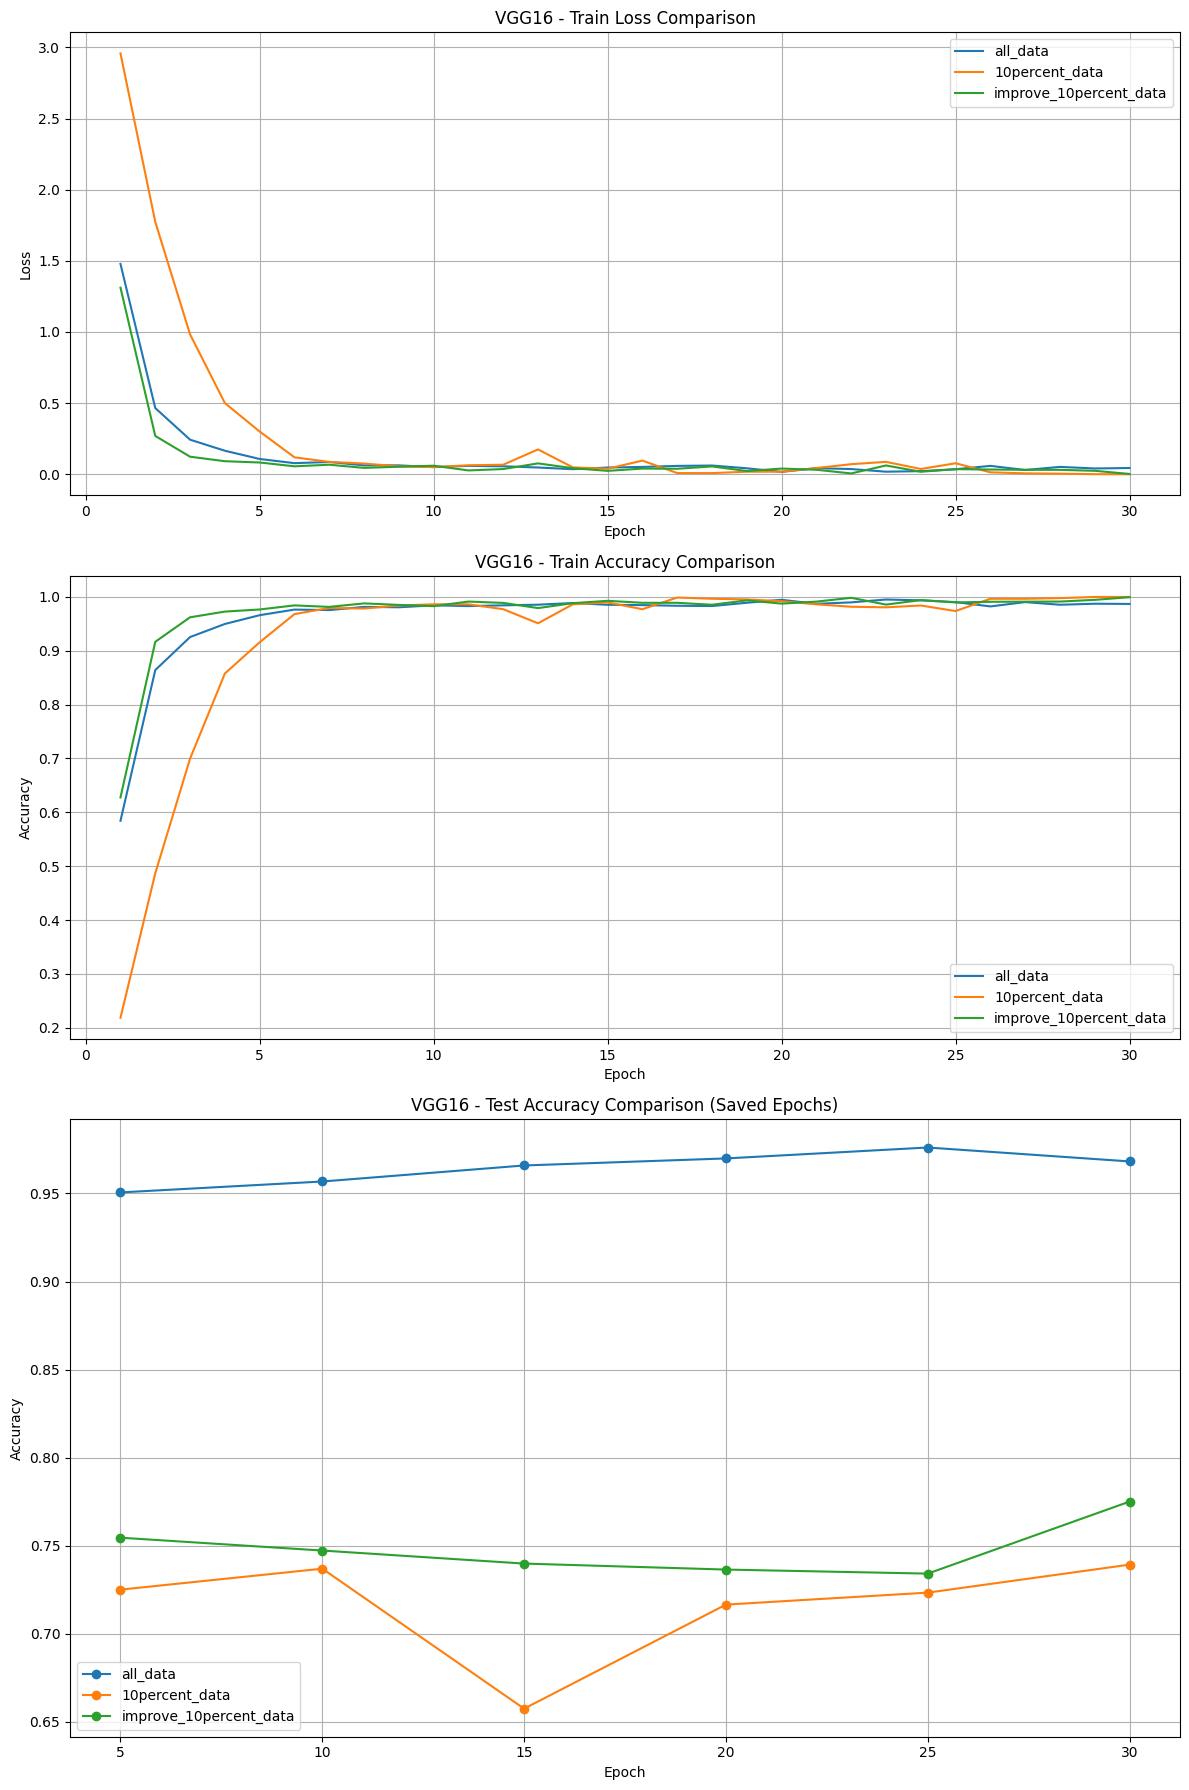

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 解析日志数据并构建结果字典
results = {
    "all_data": {
        "train_loss": [1.4781, 0.4652, 0.2430, 0.1654, 0.1075, 0.0781, 0.0863, 0.0626, 0.0626, 0.0500, 
                      0.0590, 0.0561, 0.0475, 0.0357, 0.0473, 0.0516, 0.0588, 0.0614, 0.0421, 0.0169,
                      0.0427, 0.0367, 0.0181, 0.0220, 0.0352, 0.0591, 0.0299, 0.0518, 0.0408, 0.0440],
        "train_acc": [0.5843, 0.8642, 0.9255, 0.9498, 0.9661, 0.9765, 0.9756, 0.9815, 0.9808, 0.9844,
                     0.9830, 0.9844, 0.9856, 0.9887, 0.9854, 0.9848, 0.9836, 0.9831, 0.9892, 0.9947,
                     0.9872, 0.9899, 0.9952, 0.9937, 0.9904, 0.9824, 0.9904, 0.9855, 0.9874, 0.9870],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.9506, 0.9568, 0.9659, 0.9699, 0.9761, 0.9682]
    },
    "10percent_data": {
        "train_loss": [2.9579, 1.7735, 0.9830, 0.5004, 0.3004, 0.1190, 0.0870, 0.0753, 0.0555, 0.0508,
                     0.0630, 0.0672, 0.1746, 0.0484, 0.0390, 0.0960, 0.0085, 0.0081, 0.0179, 0.0182,
                     0.0437, 0.0708, 0.0872, 0.0372, 0.0772, 0.0137, 0.0064, 0.0042, 0.0006, 0.0002],
        "train_acc": [0.2184, 0.4869, 0.6997, 0.8578, 0.9158, 0.9681, 0.9795, 0.9784, 0.9841, 0.9863,
                    0.9863, 0.9772, 0.9511, 0.9863, 0.9898, 0.9772, 0.9989, 0.9966, 0.9954, 0.9920,
                    0.9863, 0.9818, 0.9807, 0.9841, 0.9738, 0.9966, 0.9966, 0.9977, 1.0000, 1.0000],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.7250, 0.7369, 0.6574, 0.7165, 0.7233, 0.7392]
    },
    "improve_10percent_data": {
        "train_loss": [1.3114, 0.2693, 0.1234, 0.0918, 0.0827, 0.0559, 0.0671, 0.0449, 0.0530, 0.0601,
                     0.0270, 0.0367, 0.0765, 0.0427, 0.0239, 0.0400, 0.0387, 0.0552, 0.0228, 0.0400,
                     0.0318, 0.0058, 0.0618, 0.0177, 0.0358, 0.0333, 0.0314, 0.0311, 0.0244, 0.0022],
        "train_acc": [0.6276, 0.9167, 0.9622, 0.9728, 0.9767, 0.9843, 0.9815, 0.9880, 0.9852, 0.9829,
                    0.9914, 0.9889, 0.9793, 0.9884, 0.9928, 0.9891, 0.9891, 0.9855, 0.9936, 0.9876,
                    0.9913, 0.9984, 0.9858, 0.9941, 0.9898, 0.9910, 0.9912, 0.9914, 0.9946, 0.9995],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.7545, 0.7472, 0.7398, 0.7364, 0.7341, 0.7750]
    }
}

# 构造 DataFrame 表格数据
table_data = []
for key, data in results.items():
    for epoch, loss, acc in zip(range(1, len(data["train_loss"]) + 1), data["train_loss"], data["train_acc"]):
        test_acc = None
        if epoch in data["test_epochs"]:
            idx = data["test_epochs"].index(epoch)
            test_acc = data["test_acc"][idx]
        table_data.append([key, epoch, loss, acc, test_acc])

df = pd.DataFrame(table_data, columns=["Setting", "Epoch", "Train Loss", "Train Accuracy", "Test Accuracy"])
df_pivot = df.pivot(index="Epoch", columns="Setting", values="Test Accuracy")

# 重新绘图，加上表格
fig, axs = plt.subplots(3, 1, figsize=(12, 18), gridspec_kw={"height_ratios": [3, 3, 4]})

# 训练损失曲线
for key, data in results.items():
    epochs = list(range(1, len(data["train_loss"]) + 1))
    axs[0].plot(epochs, data["train_loss"], label=key)
axs[0].set_title("VGG16 - Train Loss Comparison")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

# 训练准确率曲线
for key, data in results.items():
    epochs = list(range(1, len(data["train_acc"]) + 1))
    axs[1].plot(epochs, data["train_acc"], label=key)
axs[1].set_title("VGG16 - Train Accuracy Comparison")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].legend()
axs[1].grid(True)

# 测试准确率曲线 + 表格
for key, data in results.items():
    axs[2].plot(data["test_epochs"], data["test_acc"], marker='o', label=key)
axs[2].set_title("VGG16 - Test Accuracy Comparison (Saved Epochs)")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("Accuracy")
axs[2].legend()
axs[2].grid(True)


plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

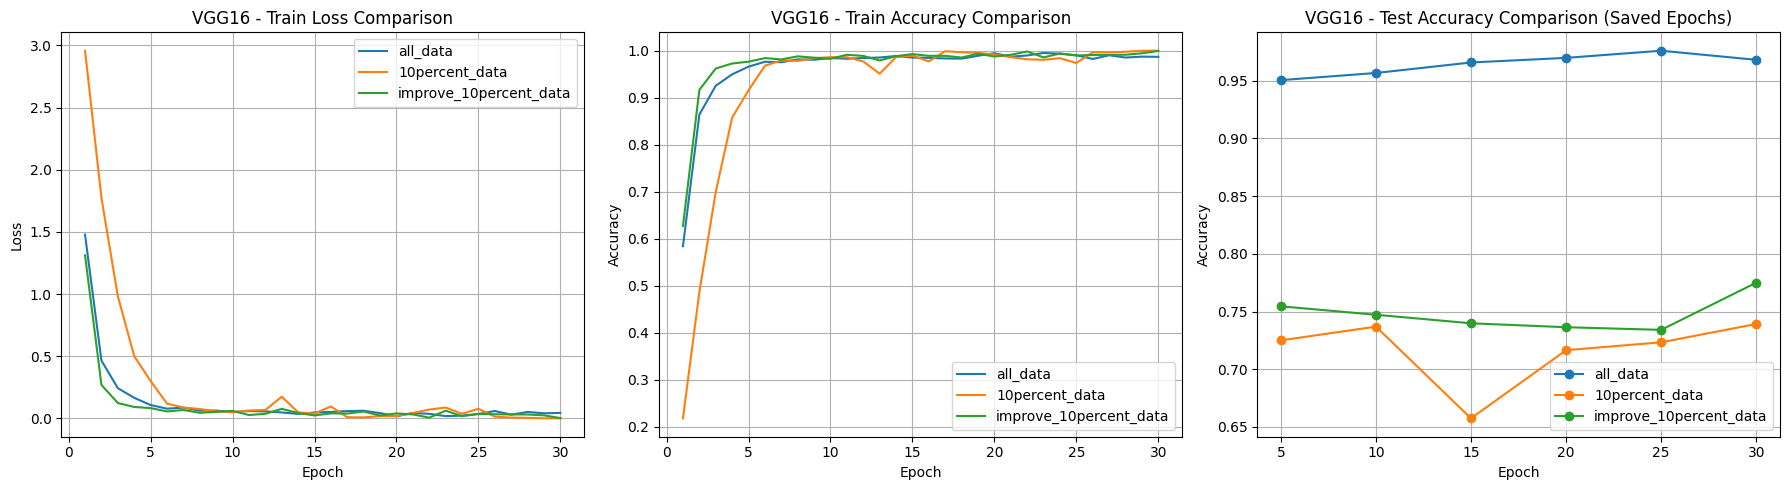

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 解析日志数据并构建结果字典
results = {
    "all_data": {
        "train_loss": [1.4781, 0.4652, 0.2430, 0.1654, 0.1075, 0.0781, 0.0863, 0.0626, 0.0626, 0.0500, 
                      0.0590, 0.0561, 0.0475, 0.0357, 0.0473, 0.0516, 0.0588, 0.0614, 0.0421, 0.0169,
                      0.0427, 0.0367, 0.0181, 0.0220, 0.0352, 0.0591, 0.0299, 0.0518, 0.0408, 0.0440],
        "train_acc": [0.5843, 0.8642, 0.9255, 0.9498, 0.9661, 0.9765, 0.9756, 0.9815, 0.9808, 0.9844,
                     0.9830, 0.9844, 0.9856, 0.9887, 0.9854, 0.9848, 0.9836, 0.9831, 0.9892, 0.9947,
                     0.9872, 0.9899, 0.9952, 0.9937, 0.9904, 0.9824, 0.9904, 0.9855, 0.9874, 0.9870],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.9506, 0.9568, 0.9659, 0.9699, 0.9761, 0.9682]
    },
    "10percent_data": {
        "train_loss": [2.9579, 1.7735, 0.9830, 0.5004, 0.3004, 0.1190, 0.0870, 0.0753, 0.0555, 0.0508,
                     0.0630, 0.0672, 0.1746, 0.0484, 0.0390, 0.0960, 0.0085, 0.0081, 0.0179, 0.0182,
                     0.0437, 0.0708, 0.0872, 0.0372, 0.0772, 0.0137, 0.0064, 0.0042, 0.0006, 0.0002],
        "train_acc": [0.2184, 0.4869, 0.6997, 0.8578, 0.9158, 0.9681, 0.9795, 0.9784, 0.9841, 0.9863,
                    0.9863, 0.9772, 0.9511, 0.9863, 0.9898, 0.9772, 0.9989, 0.9966, 0.9954, 0.9920,
                    0.9863, 0.9818, 0.9807, 0.9841, 0.9738, 0.9966, 0.9966, 0.9977, 1.0000, 1.0000],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.7250, 0.7369, 0.6574, 0.7165, 0.7233, 0.7392]
    },
    "improve_10percent_data": {
        "train_loss": [1.3114, 0.2693, 0.1234, 0.0918, 0.0827, 0.0559, 0.0671, 0.0449, 0.0530, 0.0601,
                     0.0270, 0.0367, 0.0765, 0.0427, 0.0239, 0.0400, 0.0387, 0.0552, 0.0228, 0.0400,
                     0.0318, 0.0058, 0.0618, 0.0177, 0.0358, 0.0333, 0.0314, 0.0311, 0.0244, 0.0022],
        "train_acc": [0.6276, 0.9167, 0.9622, 0.9728, 0.9767, 0.9843, 0.9815, 0.9880, 0.9852, 0.9829,
                    0.9914, 0.9889, 0.9793, 0.9884, 0.9928, 0.9891, 0.9891, 0.9855, 0.9936, 0.9876,
                    0.9913, 0.9984, 0.9858, 0.9941, 0.9898, 0.9910, 0.9912, 0.9914, 0.9946, 0.9995],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.7545, 0.7472, 0.7398, 0.7364, 0.7341, 0.7750]
    }
}

# 构造 DataFrame 表格数据
table_data = []
for key, data in results.items():
    for epoch, loss, acc in zip(range(1, len(data["train_loss"]) + 1), data["train_loss"], data["train_acc"]):
        test_acc = None
        if epoch in data["test_epochs"]:
            idx = data["test_epochs"].index(epoch)
            test_acc = data["test_acc"][idx]
        table_data.append([key, epoch, loss, acc, test_acc])

df = pd.DataFrame(table_data, columns=["Setting", "Epoch", "Train Loss", "Train Accuracy", "Test Accuracy"])
df_pivot = df.pivot(index="Epoch", columns="Setting", values="Test Accuracy")

# 创建一行三列的图表布局
plt.figure(figsize=(18, 5))

# 1. 训练损失曲线
plt.subplot(1, 3, 1)
for key, data in results.items():
    epochs = list(range(1, len(data["train_loss"]) + 1))
    plt.plot(epochs, data["train_loss"], label=key)
plt.title("VGG16 - Train Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# 2. 训练准确率曲线
plt.subplot(1, 3, 2)
for key, data in results.items():
    epochs = list(range(1, len(data["train_acc"]) + 1))
    plt.plot(epochs, data["train_acc"], label=key)
plt.title("VGG16 - Train Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# 3. 测试准确率曲线
plt.subplot(1, 3, 3)
for key, data in results.items():
    plt.plot(data["test_epochs"], data["test_acc"], 'o-', label=key)
plt.title("VGG16 - Test Accuracy Comparison (Saved Epochs)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


VIT不同数据集对比

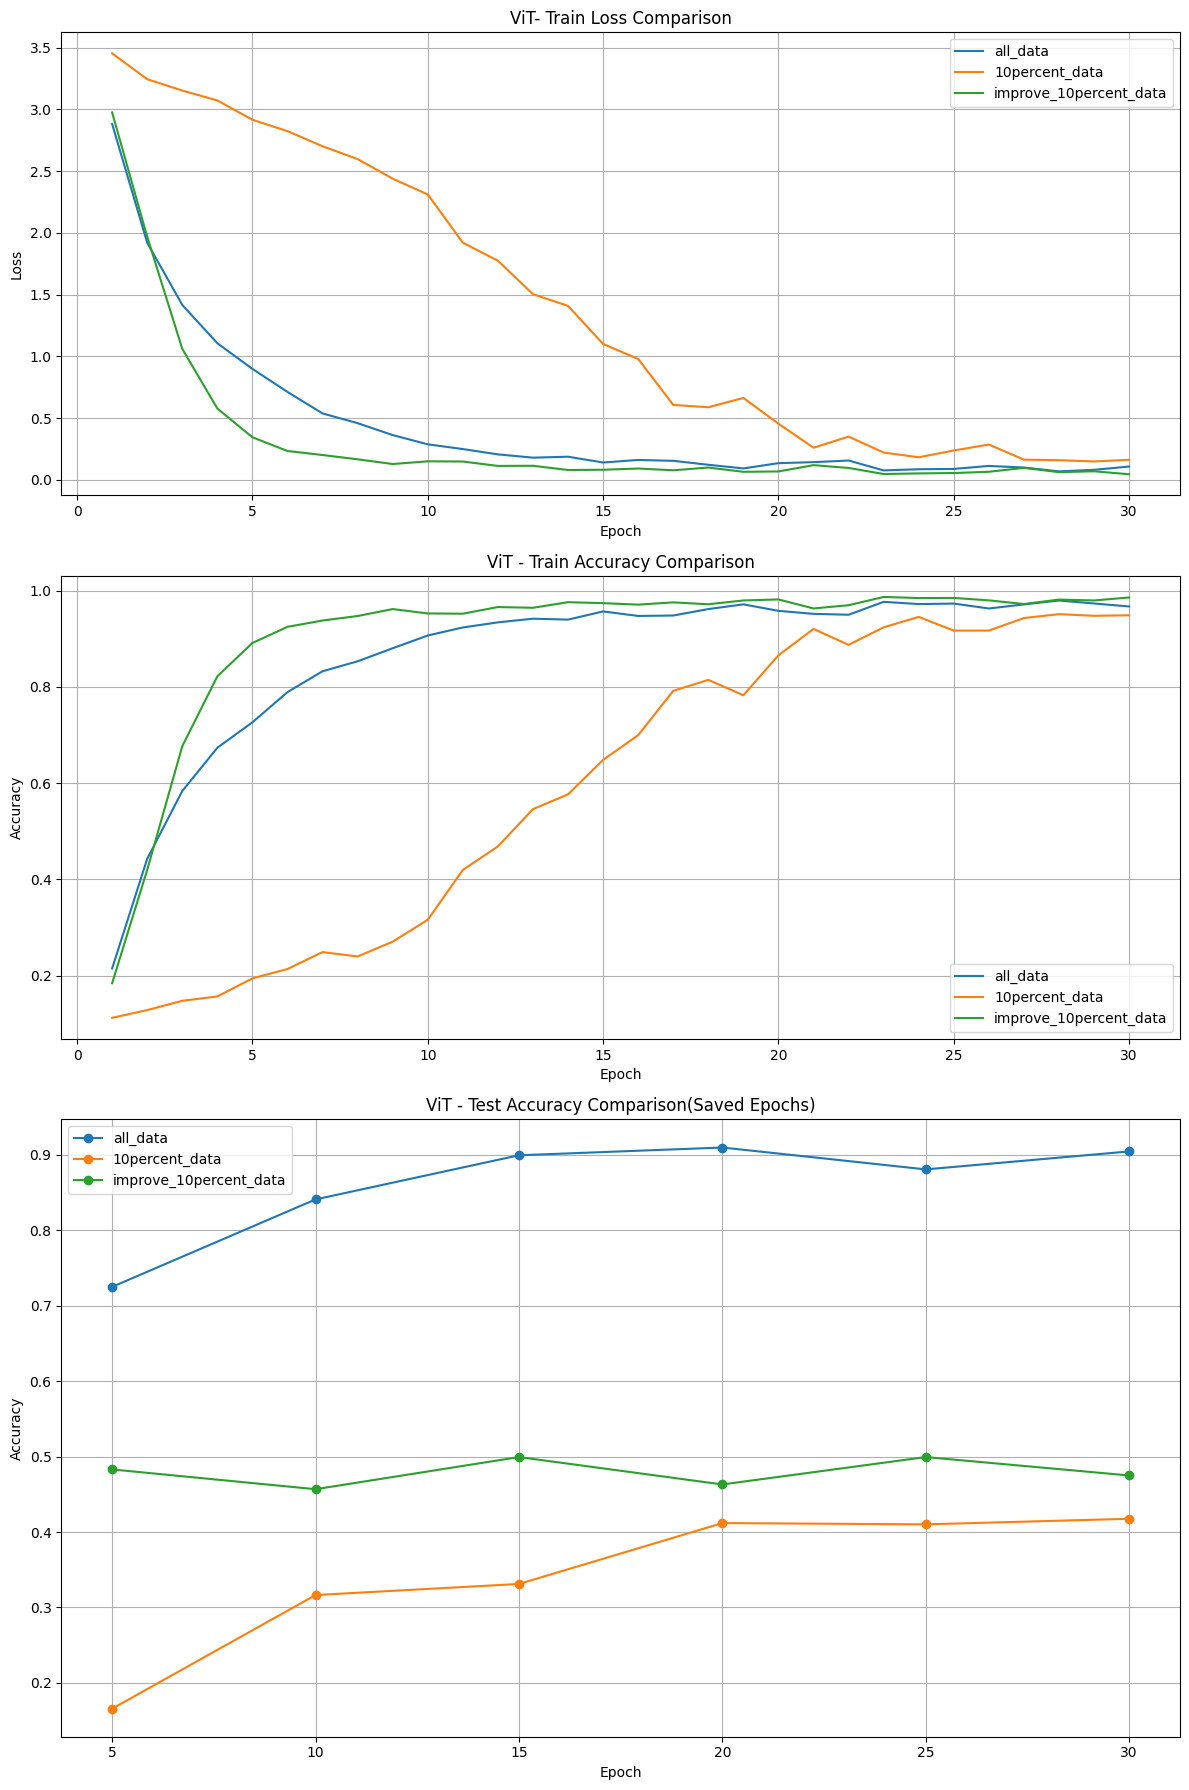

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 解析日志数据并构建结果字典
results = {
    "all_data": {
        "train_loss": [2.8819, 1.9197, 1.4164, 1.1062, 0.8983, 0.7117, 0.5375, 0.4586, 0.3623, 0.2875, 
                       0.2490, 0.2060, 0.1793, 0.1870, 0.1402, 0.1608, 0.1538, 0.1218, 0.0922, 0.1348,
                       0.1431, 0.1560, 0.0761, 0.0856, 0.0882, 0.1123, 0.0995, 0.0683, 0.0808, 0.1076],
        "train_acc": [0.2151, 0.4429, 0.5837, 0.6736, 0.7264, 0.7892, 0.8325, 0.8532, 0.8803, 0.9068,
                      0.9235, 0.9341, 0.9417, 0.9398, 0.9568, 0.9474, 0.9483, 0.9617, 0.9715, 0.9580,
                      0.9518, 0.9499, 0.9767, 0.9721, 0.9731, 0.9629, 0.9714, 0.9794, 0.9733, 0.9671],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.7250, 0.8409, 0.8994, 0.9097, 0.8807, 0.9045]
    },
    "10percent_data": {
        "train_loss": [3.4534, 3.2444, 3.1523, 3.0723, 2.9159, 2.8237, 2.7014, 2.5973, 2.4388, 2.3108,
                       1.9204, 1.7745, 1.5031, 1.4084, 1.1000, 0.9789, 0.6065, 0.5876, 0.6631, 0.4545,
                       0.2598, 0.3498, 0.2208, 0.1825, 0.2375, 0.2855, 0.1632, 0.1589, 0.1485, 0.1624],
        "train_acc": [0.1126, 0.1286, 0.1479, 0.1570, 0.1945, 0.2139, 0.2491, 0.2400, 0.2708, 0.3163,
                      0.4198, 0.4687, 0.5461, 0.5768, 0.6485, 0.6997, 0.7918, 0.8146, 0.7827, 0.8658,
                      0.9204, 0.8874, 0.9238, 0.9454, 0.9170, 0.9170, 0.9431, 0.9511, 0.9477, 0.9488],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.1659, 0.3165, 0.3312, 0.4119, 0.4102, 0.4176]
    },
    "improve_10percent_data": {
        "train_loss": [2.9751, 1.9681, 1.0606, 0.5772, 0.3445, 0.2334, 0.2007, 0.1660, 0.1279, 0.1497,
                       0.1481, 0.1124, 0.1137, 0.0795, 0.0814, 0.0914, 0.0771, 0.0995, 0.0648, 0.0677,
                       0.1188, 0.0961, 0.0470, 0.0519, 0.0549, 0.0651, 0.0967, 0.0619, 0.0690, 0.0451],
        "train_acc": [0.1844, 0.4199, 0.6768, 0.8220, 0.8912, 0.9248, 0.9379, 0.9473, 0.9617, 0.9526,
                      0.9521, 0.9659, 0.9644, 0.9760, 0.9740, 0.9709, 0.9756, 0.9717, 0.9796, 0.9817,
                      0.9630, 0.9697, 0.9869, 0.9846, 0.9848, 0.9798, 0.9722, 0.9814, 0.9796, 0.9858],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.4830, 0.4568, 0.4994, 0.4631, 0.4994, 0.4750]
    }
}

# 构造 DataFrame 表格数据
table_data = []
for key, data in results.items():
    for epoch, loss, acc in zip(range(1, len(data["train_loss"]) + 1), data["train_loss"], data["train_acc"]):
        test_acc = None
        if epoch in data["test_epochs"]:
            idx = data["test_epochs"].index(epoch)
            test_acc = data["test_acc"][idx]
        table_data.append([key, epoch, loss, acc, test_acc])

df = pd.DataFrame(table_data, columns=["Setting", "Epoch", "Train Loss", "Train Accuracy", "Test Accuracy"])
df_pivot = df.pivot(index="Epoch", columns="Setting", values="Test Accuracy")

# 重新绘图，加上表格
fig, axs = plt.subplots(3, 1, figsize=(12, 18), gridspec_kw={"height_ratios": [3, 3, 4]})

# 训练损失曲线
for key, data in results.items():
    epochs = list(range(1, len(data["train_loss"]) + 1))
    axs[0].plot(epochs, data["train_loss"], label=key)
axs[0].set_title("ViT- Train Loss Comparison")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

# 训练准确率曲线
for key, data in results.items():
    epochs = list(range(1, len(data["train_acc"]) + 1))
    axs[1].plot(epochs, data["train_acc"], label=key)
axs[1].set_title("ViT - Train Accuracy Comparison")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].legend()
axs[1].grid(True)

# 测试准确率曲线 + 表格
for key, data in results.items():
    axs[2].plot(data["test_epochs"], data["test_acc"], marker='o', label=key)
axs[2].set_title("ViT - Test Accuracy Comparison(Saved Epochs)")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("Accuracy")
axs[2].legend()
axs[2].grid(True)


plt.tight_layout()
plt.show()

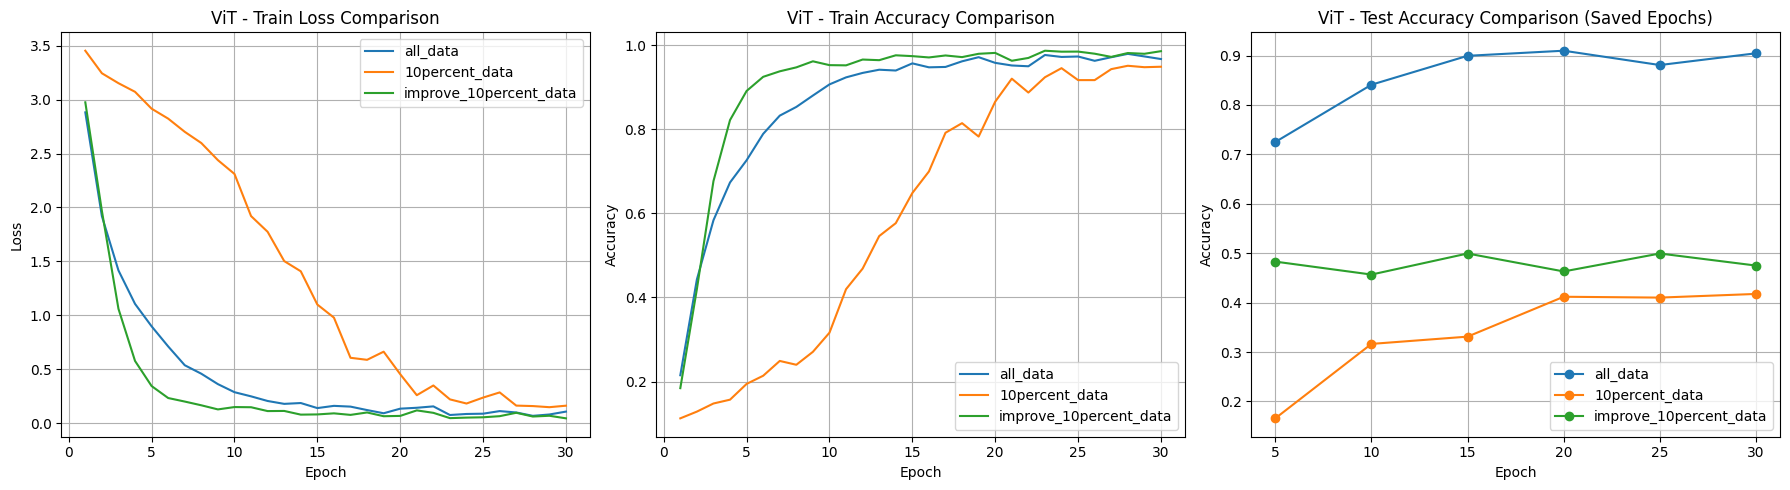

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 解析日志数据并构建结果字典
results = {
    "all_data": {
        "train_loss": [2.8819, 1.9197, 1.4164, 1.1062, 0.8983, 0.7117, 0.5375, 0.4586, 0.3623, 0.2875, 
                       0.2490, 0.2060, 0.1793, 0.1870, 0.1402, 0.1608, 0.1538, 0.1218, 0.0922, 0.1348,
                       0.1431, 0.1560, 0.0761, 0.0856, 0.0882, 0.1123, 0.0995, 0.0683, 0.0808, 0.1076],
        "train_acc": [0.2151, 0.4429, 0.5837, 0.6736, 0.7264, 0.7892, 0.8325, 0.8532, 0.8803, 0.9068,
                      0.9235, 0.9341, 0.9417, 0.9398, 0.9568, 0.9474, 0.9483, 0.9617, 0.9715, 0.9580,
                      0.9518, 0.9499, 0.9767, 0.9721, 0.9731, 0.9629, 0.9714, 0.9794, 0.9733, 0.9671],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.7250, 0.8409, 0.8994, 0.9097, 0.8807, 0.9045]
    },
    "10percent_data": {
        "train_loss": [3.4534, 3.2444, 3.1523, 3.0723, 2.9159, 2.8237, 2.7014, 2.5973, 2.4388, 2.3108,
                       1.9204, 1.7745, 1.5031, 1.4084, 1.1000, 0.9789, 0.6065, 0.5876, 0.6631, 0.4545,
                       0.2598, 0.3498, 0.2208, 0.1825, 0.2375, 0.2855, 0.1632, 0.1589, 0.1485, 0.1624],
        "train_acc": [0.1126, 0.1286, 0.1479, 0.1570, 0.1945, 0.2139, 0.2491, 0.2400, 0.2708, 0.3163,
                      0.4198, 0.4687, 0.5461, 0.5768, 0.6485, 0.6997, 0.7918, 0.8146, 0.7827, 0.8658,
                      0.9204, 0.8874, 0.9238, 0.9454, 0.9170, 0.9170, 0.9431, 0.9511, 0.9477, 0.9488],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.1659, 0.3165, 0.3312, 0.4119, 0.4102, 0.4176]
    },
    "improve_10percent_data": {
        "train_loss": [2.9751, 1.9681, 1.0606, 0.5772, 0.3445, 0.2334, 0.2007, 0.1660, 0.1279, 0.1497,
                       0.1481, 0.1124, 0.1137, 0.0795, 0.0814, 0.0914, 0.0771, 0.0995, 0.0648, 0.0677,
                       0.1188, 0.0961, 0.0470, 0.0519, 0.0549, 0.0651, 0.0967, 0.0619, 0.0690, 0.0451],
        "train_acc": [0.1844, 0.4199, 0.6768, 0.8220, 0.8912, 0.9248, 0.9379, 0.9473, 0.9617, 0.9526,
                      0.9521, 0.9659, 0.9644, 0.9760, 0.9740, 0.9709, 0.9756, 0.9717, 0.9796, 0.9817,
                      0.9630, 0.9697, 0.9869, 0.9846, 0.9848, 0.9798, 0.9722, 0.9814, 0.9796, 0.9858],
        "test_epochs": [5, 10, 15, 20, 25, 30],
        "test_acc": [0.4830, 0.4568, 0.4994, 0.4631, 0.4994, 0.4750]
    }
}

# 构造 DataFrame 表格数据
table_data = []
for key, data in results.items():
    for epoch, loss, acc in zip(range(1, len(data["train_loss"]) + 1), data["train_loss"], data["train_acc"]):
        test_acc = None
        if epoch in data["test_epochs"]:
            idx = data["test_epochs"].index(epoch)
            test_acc = data["test_acc"][idx]
        table_data.append([key, epoch, loss, acc, test_acc])

df = pd.DataFrame(table_data, columns=["Setting", "Epoch", "Train Loss", "Train Accuracy", "Test Accuracy"])
df_pivot = df.pivot(index="Epoch", columns="Setting", values="Test Accuracy")

# 创建一行三列的图表布局
plt.figure(figsize=(18, 5))

# 1. 训练损失曲线
plt.subplot(1, 3, 1)
for key, data in results.items():
    epochs = list(range(1, len(data["train_loss"]) + 1))
    plt.plot(epochs, data["train_loss"], label=key)
plt.title("ViT - Train Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# 2. 训练准确率曲线
plt.subplot(1, 3, 2)
for key, data in results.items():
    epochs = list(range(1, len(data["train_acc"]) + 1))
    plt.plot(epochs, data["train_acc"], label=key)
plt.title("ViT - Train Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# 3. 测试准确率曲线
plt.subplot(1, 3, 3)
for key, data in results.items():
    plt.plot(data["test_epochs"], data["test_acc"], 'o-', label=key)
plt.title("ViT - Test Accuracy Comparison (Saved Epochs)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

